### **Importar librerías**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Metricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Ver los primeros registros
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### **Análisis Exploratorio de Datos (EDA)**

In [3]:
# Ver la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
# Ver la cantidad de valores nulos
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
# Ver cantidad de valores NaN
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
# Ver la cantidad de valores únicos las variables categóricas
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [7]:
# Ver estadísticas descriptivas
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [8]:
# Configuración de gráficos
plt.rcParams['figure.figsize'] = (6, 4)

# Fuente Palatino Linotype
plt.rcParams['font.family'] = 'Palatino Linotype'

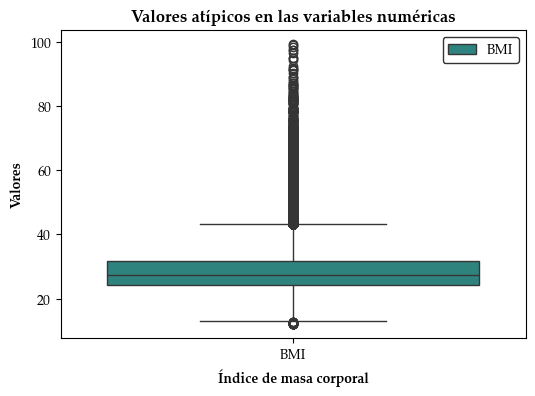

In [9]:
# Ver valores atípicos en las variables numéricas
sns.boxplot(data=df[['BMI']], palette='viridis')
plt.title('Valores atípicos en las variables numéricas', fontweight='bold')
# Eje x
plt.xlabel('Índice de masa corporal', fontweight='bold')
# Eje y
plt.ylabel('Valores', fontweight='bold')
# Leyenda
plt.legend(['BMI'], loc='best', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()


In [10]:
# Ver los nombres de los valores unicos de General_Health
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [11]:
# Ver los nombres de los valores unicos de Checkup
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [12]:
# Ver los nombres de los valores unicos de Exercise
df['Exercise'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Ver los nombres de los valores unicos de Skin_Cancer
df['Skin_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Ver los nombres de los valores unicos de Other_Cancer
df['Other_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Ver los nombres de los valores unicos de Depression
df['Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Ver los nombres de los valores unicos de Diabetes
df['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [17]:
# Ver los nombres de los valores unicos de Arthritis
df['Arthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
# Ver los nombres de los valores unicos de Sex
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
# Ver los nombres de los valores unicos de Age_Category
df['Age_Category'].unique()

# Ver los nombres de los valores unicos de Age Category organizado de menor a mayor
df['Age_Category'].value_counts().sort_index()

Age_Category
18-24    18681
25-29    15494
30-34    18428
35-39    20606
40-44    21595
45-49    20968
50-54    25097
55-59    28054
60-64    32418
65-69    33434
70-74    31103
75-79    20705
80+      22271
Name: count, dtype: int64

In [20]:
# Ver los nombres de los valores unicos de Smoking_History
df['Smoking_History'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
# Ver los nombres de los valores unicos de Heart_Disease
df['Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

### **Conversión de variables categóricas**

In [3]:
# Convertir manualmente las variables categóricas a numéricas

# General_Health
df['General_Health'] = df['General_Health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})

# Checkup
df['Checkup'] = df['Checkup'].replace({'Within the past 2 years': 0, 'Within the past year': 1, 'Within the past 5 years': 2, '5 or more years ago': 3, 'Never': 4})

# Exercise
df['Exercise'] = df['Exercise'].replace({'No': 0, 'Yes': 1})

# Skin_Cancer
df['Skin_Cancer'] = df['Skin_Cancer'].replace({'No': 0, 'Yes': 1})

# Other_Cancer
df['Other_Cancer'] = df['Other_Cancer'].replace({'No': 0, 'Yes': 1})

# Depression
df['Depression'] = df['Depression'].replace({'No': 0, 'Yes': 1})

# Diabetes
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1, 'No, pre-diabetes or borderline diabetes': 2, 'Yes, but female told only during pregnancy': 3})

# Arthritis
df['Arthritis'] = df['Arthritis'].replace({'No': 0, 'Yes': 1})

# Sex
df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})

# Age_Category
df['Age_Category'] = df['Age_Category'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12})

# Smoking_History
df['Smoking_History'] = df['Smoking_History'].replace({'No': 0, 'Yes': 1})

# Heart_Disease
df['Heart_Disease'] = df['Heart_Disease'].replace({'No': 0, 'Yes': 1})

C:\Users\range\AppData\Local\Temp\ipykernel_7972\3802168498.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['General_Health'] = df['General_Health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})
C:\Users\range\AppData\Local\Temp\ipykernel_7972\3802168498.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Checkup'] = df['Checkup'].replace({'Within the past 2 years': 0, 'Within the past year': 1, 'Within the past 5 years': 2, '5 or more years ago': 3, 'Never': 4})
C:\Users\range\AppData\Local

In [4]:
# Ver los primeros registros
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,1,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


### **Resolver desbalance de clases**

In [24]:
# Resolver el desbalanceo de clases
# Conteo de las clases
df['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [5]:
# Sobremuestreo de la clase minoritaria de Heart_Disease (1) con la tecnica SMOTE
from imblearn.over_sampling import SMOTE

# Heart_Disease (1)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Conteo de las clases
y_sm.value_counts()

Heart_Disease
0    283883
1    283883
Name: count, dtype: int64

### **Sobremuestreo de todas las clases (Incompleto)**

In [7]:
# Aplicar SMOTE a todas las clases
# General_Health
X = df.drop('General_Health', axis=1)
y = df['General_Health']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Checkup
X = df.drop('Checkup', axis=1)
y = df['Checkup']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Exercise
X = df.drop('Exercise', axis=1)
y = df['Exercise']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Skin_Cancer
X = df.drop('Skin_Cancer', axis=1)
y = df['Skin_Cancer']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Other_Cancer
X = df.drop('Other_Cancer', axis=1)
y = df['Other_Cancer']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Depression
X = df.drop('Depression', axis=1)
y = df['Depression']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Diabetes
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Arthritis
X = df.drop('Arthritis', axis=1)
y = df['Arthritis']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Sex
X = df.drop('Sex', axis=1)
X_sm, y_sm = smote.fit_resample(X, y)

# Age_Category
X = df.drop('Age_Category', axis=1)
y = df['Age_Category']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Smoking_History
X = df.drop('Smoking_History', axis=1)
y = df['Smoking_History']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Aplicar las variables númericas [...]

# Height_(cm)
X = df.drop('Height_(cm)', axis=1)
y = df['Height_(cm)']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Weight_(kg)
X = df.drop('Weight_(kg)', axis=1)
y = df['Weight_(kg)']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# BMI
X = df.drop('BMI', axis=1)
y = df['BMI']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Alcohol_Consumption
X = df.drop('Alcohol_Consumption', axis=1)
y = df['Alcohol_Consumption']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Fruit_Consumption
X = df.drop('Fruit_Consumption', axis=1)
y = df['Fruit_Consumption']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Green_Vegetables_Consumption
X = df.drop('Green_Vegetables_Consumption', axis=1)
y = df['Green_Vegetables_Consumption']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# FriedPotato_Consumption
X = df.drop('FriedPotato_Consumption', axis=1)
y = df['FriedPotato_Consumption']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [13]:
# Integrar todas las variables balanceadas a un solo dataframe
df = pd.concat([X_sm, y_sm], axis=1)

In [17]:
# Ver el conteo de las clases de X_sm
y_sm.value_counts()

Smoking_History
1    183590
0    183590
Name: count, dtype: int64

In [14]:
# Ver el conteo de todas las características balanceadas
df['Heart_Disease'].value_counts()

Heart_Disease
0    340836
1     26344
Name: count, dtype: int64

In [15]:
df['General_Health'].value_counts()

General_Health
3    126232
2    120231
4     57719
1     48123
0     14875
Name: count, dtype: int64

In [16]:
df['Checkup'].value_counts()
df['Exercise'].value_counts()
df['Skin_Cancer'].value_counts()
df['Other_Cancer'].value_counts()
df['Depression'].value_counts()
df['Diabetes'].value_counts()
df['Arthritis'].value_counts()
df['Sex'].value_counts()
df['Age_Category'].value_counts()
df['Smoking_History'].value_counts()
df['Height_(cm)'].value_counts()
df['Weight_(kg)'].value_counts()
df['BMI'].value_counts()
df['Alcohol_Consumption'].value_counts()
df['Fruit_Consumption'].value_counts()
df['Green_Vegetables_Consumption'].value_counts()
df['FriedPotato_Consumption'].value_counts()

FriedPotato_Consumption
4.000000    73876
0.000000    47942
8.000000    42371
2.000000    37669
1.000000    31159
            ...  
2.578028        1
4.812068        1
6.949603        1
1.446448        1
5.118946        1
Name: count, Length: 35103, dtype: int64

### **Selección y entrenamiento del modelo**

In [26]:
# Entrenar el modelo de Random Forest

# Definir las variables independientes
X = df.drop('Heart_Disease', axis=1)

# Definir la variable dependiente
y = df['Heart_Disease']

# Limpiar, preprocesar, escalar y normalizar los datos
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Escalar los datos
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_round = accuracy * 100
print(f'Precisión del modelo: {accuracy_round:.2f}%')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 91.91%
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.00      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



c:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\range\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Random Forest con datos balanceados**

In [27]:
# Entrenar el modelo de Random Forest con los datos balanceados

# Definir las variables independientes
X = X_sm

# Definir la variable dependiente
y = y_sm

# Limpiar, preprocesar, escalar y normalizar los datos
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Escalar los datos
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_round = accuracy * 100
print(f'Precisión del modelo: {accuracy_round:.2f}%')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 80.16%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     56701
           1       0.78      0.85      0.81     56853

    accuracy                           0.80    113554
   macro avg       0.80      0.80      0.80    113554
weighted avg       0.80      0.80      0.80    113554



### **Redes neuronales**

In [28]:
# Importar modelo de redes neuronales
from sklearn.neural_network import MLPClassifier

# Entrenar un modelo de redes neuronales de clasificacion con los datos balanceados
# Definir las variables independientes
X = X_sm

# Definir la variable dependiente
y = y_sm

# Limpiar, preprocesar, escalar y normalizar los datos
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Escalar los datos
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_round = accuracy * 100
print(f'Precisión del modelo: {accuracy_round:.2f}%')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 83.51%
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     56701
           1       0.81      0.87      0.84     56853

    accuracy                           0.84    113554
   macro avg       0.84      0.84      0.83    113554
weighted avg       0.84      0.84      0.83    113554



In [29]:
# Definir las variables independientes
X = X_sm

# Definir la variable dependiente
y = y_sm

# Instanciar el escalador
scaler = StandardScaler()

# Escalar los datos
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=4)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_round = accuracy * 100
print(f'Precisión del modelo: {accuracy_round:.2f}%')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 79.59%
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     56701
           1       0.77      0.84      0.81     56853

    accuracy                           0.80    113554
   macro avg       0.80      0.80      0.80    113554
weighted avg       0.80      0.80      0.80    113554

